In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

from scipy.stats import zscore

import matplotlib.style as style 
import warnings
warnings.filterwarnings('ignore')
style.use('fivethirtyeight')

In [3]:
data=pd.read_csv('technical_support_data-2.csv')

In [4]:
data.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [5]:
data.tail()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
18,Factory settings not working,72,2.3,125,0.02,0.00,100,0
19,WIFI connectivity breaks,290,1.1,11,0.22,0.00,90,10
20,Battery backup does not get fully charged,29,2.2,45,0.35,0.22,50,50
21,Battery does not last full 8 hrs,43,2.1,56,0.31,0.28,60,40
22,Fan speed varies at on its own,78,2.2,44,0.19,0.21,10,90


In [6]:
data.shape

(23, 8)

In [7]:
data.isna().sum()

PROBLEM_TYPE             0
no_of_cases              0
Avg_pending_calls        0
Avg_resol_time           0
recurrence_freq          0
Replace_percent          0
In_warranty_percent      0
Post_warranty_percent    0
dtype: int64

In [8]:
data.dtypes

PROBLEM_TYPE              object
no_of_cases                int64
Avg_pending_calls        float64
Avg_resol_time             int64
recurrence_freq          float64
Replace_percent          float64
In_warranty_percent        int64
Post_warranty_percent      int64
dtype: object

In [10]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PROBLEM_TYPE,23,23,WIFI connectivity breaks,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_cases,23.0,NaN,NaN,NaN,142.782609,155.098197,3.0,23.5,72.0,211.5,520.0
Avg_pending_calls,23.0,NaN,NaN,NaN,1.973913,0.982676,1.0,1.15,2.0,2.3,4.3
Avg_resol_time,23.0,NaN,NaN,NaN,63.0,58.877376,5.0,17.0,35.0,128.5,180.0
recurrence_freq,23.0,NaN,NaN,NaN,0.137826,0.118627,0.01,0.025,0.14,0.235,0.35
Replace_percent,23.0,NaN,NaN,NaN,0.1,0.182109,0.0,0.0,0.0,0.13,0.7
In_warranty_percent,23.0,NaN,NaN,NaN,69.956522,37.350281,5.0,55.0,90.0,100.0,100.0
Post_warranty_percent,23.0,NaN,NaN,NaN,30.043478,37.350281,0.0,0.0,10.0,45.0,95.0


In [13]:
sns.set(rc={'figure.figsize':(14,8)})

<AxesSubplot:>

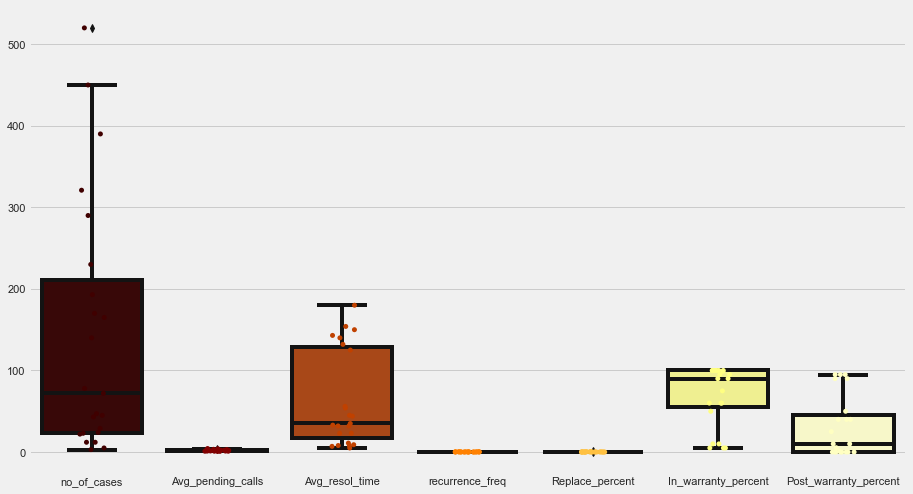

In [18]:
sns.boxplot(data=data,palette = 'afmhot')
sns.stripplot(data=data,palette='afmhot')

In [20]:
num_cols=data.select_dtypes(exclude='object').columns

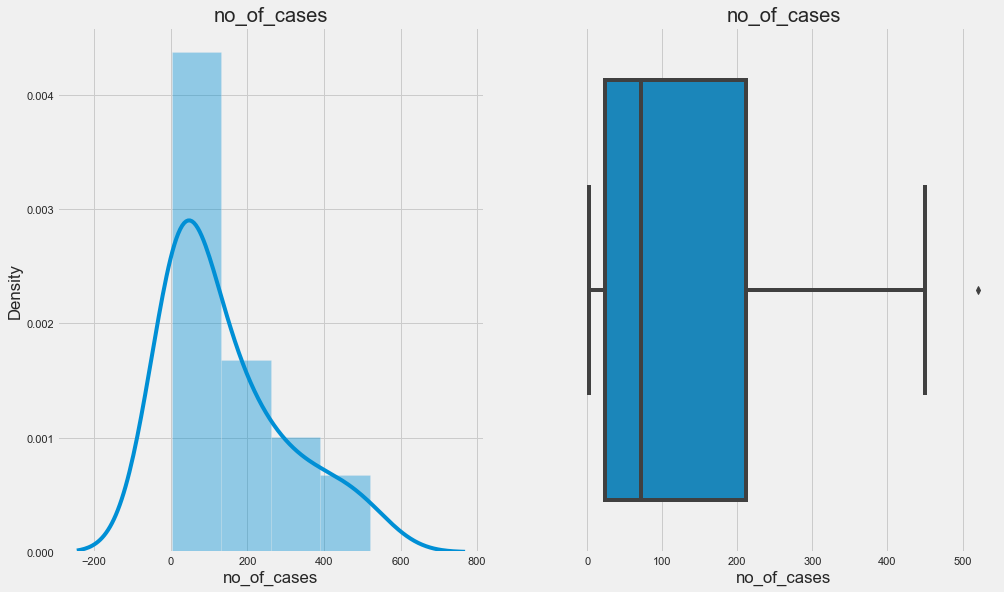

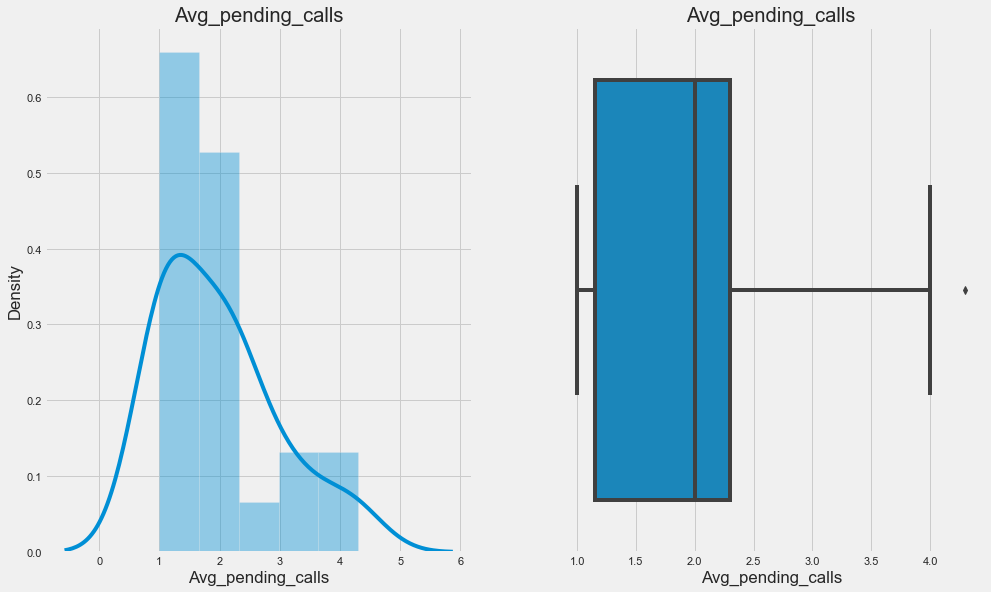

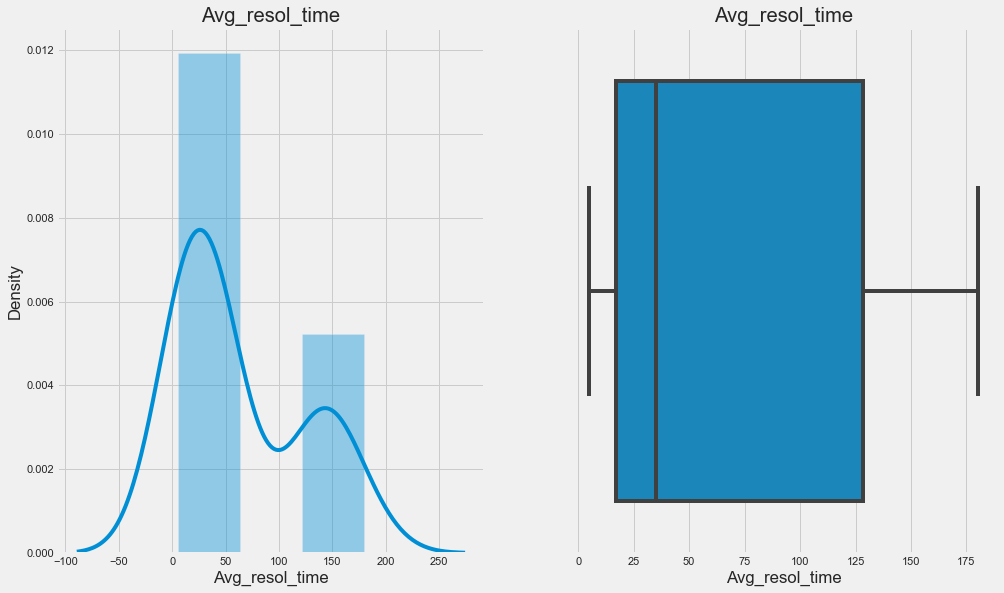

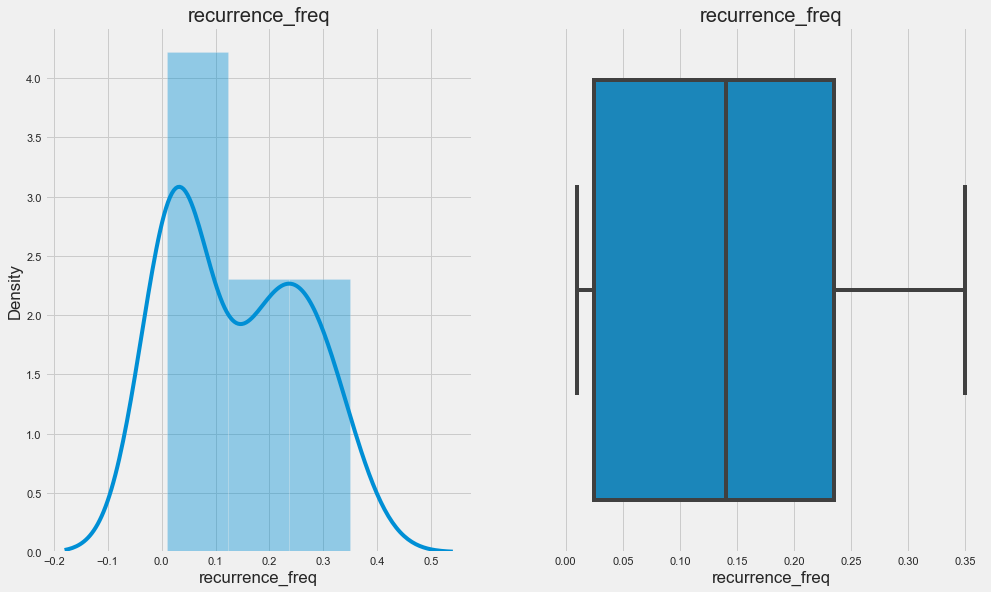

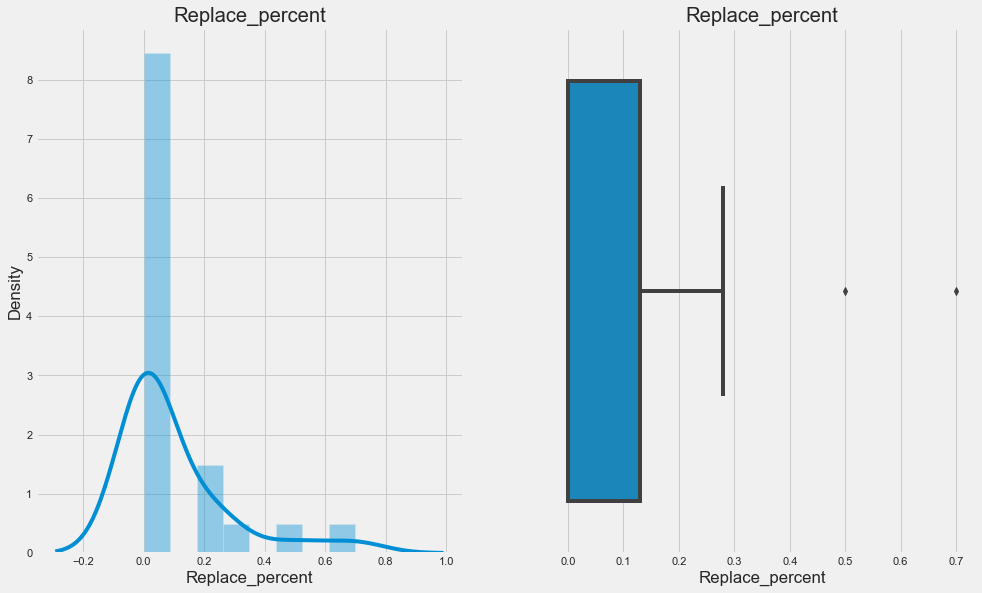

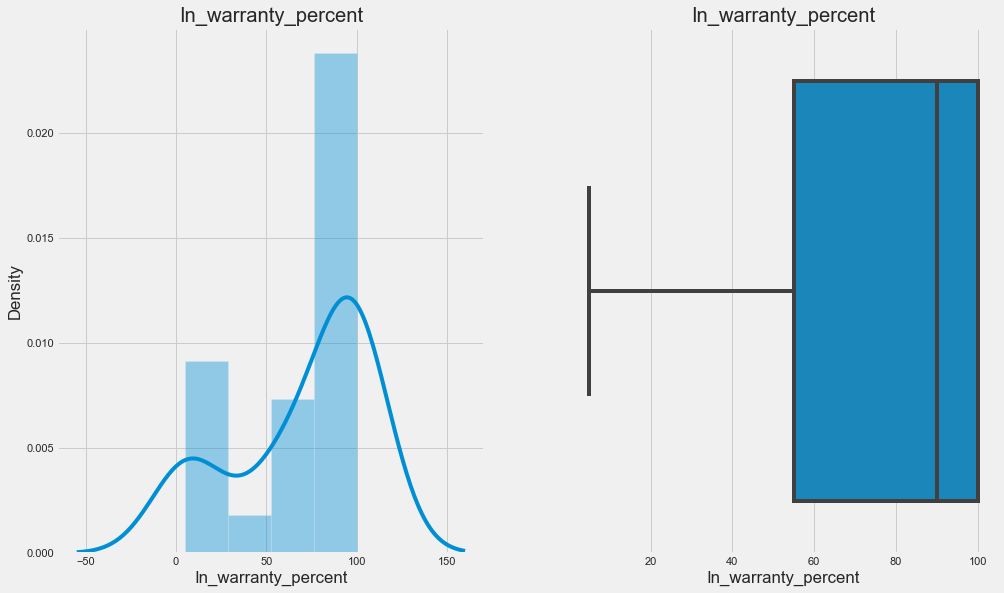

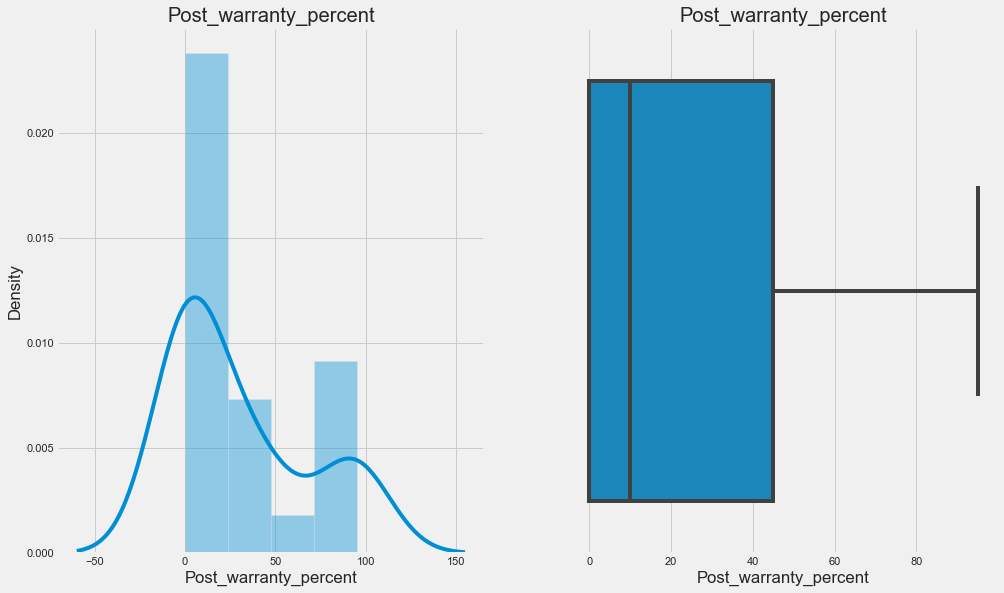

In [22]:
for i in num_cols:
    fig,ax=plt.subplots(1,2,figsize=(15,9))
    sns.distplot(data[i],ax=ax[0]).set_title(i)
    sns.boxplot(data[i],ax=ax[1]).set_title(i)
    plt.show()

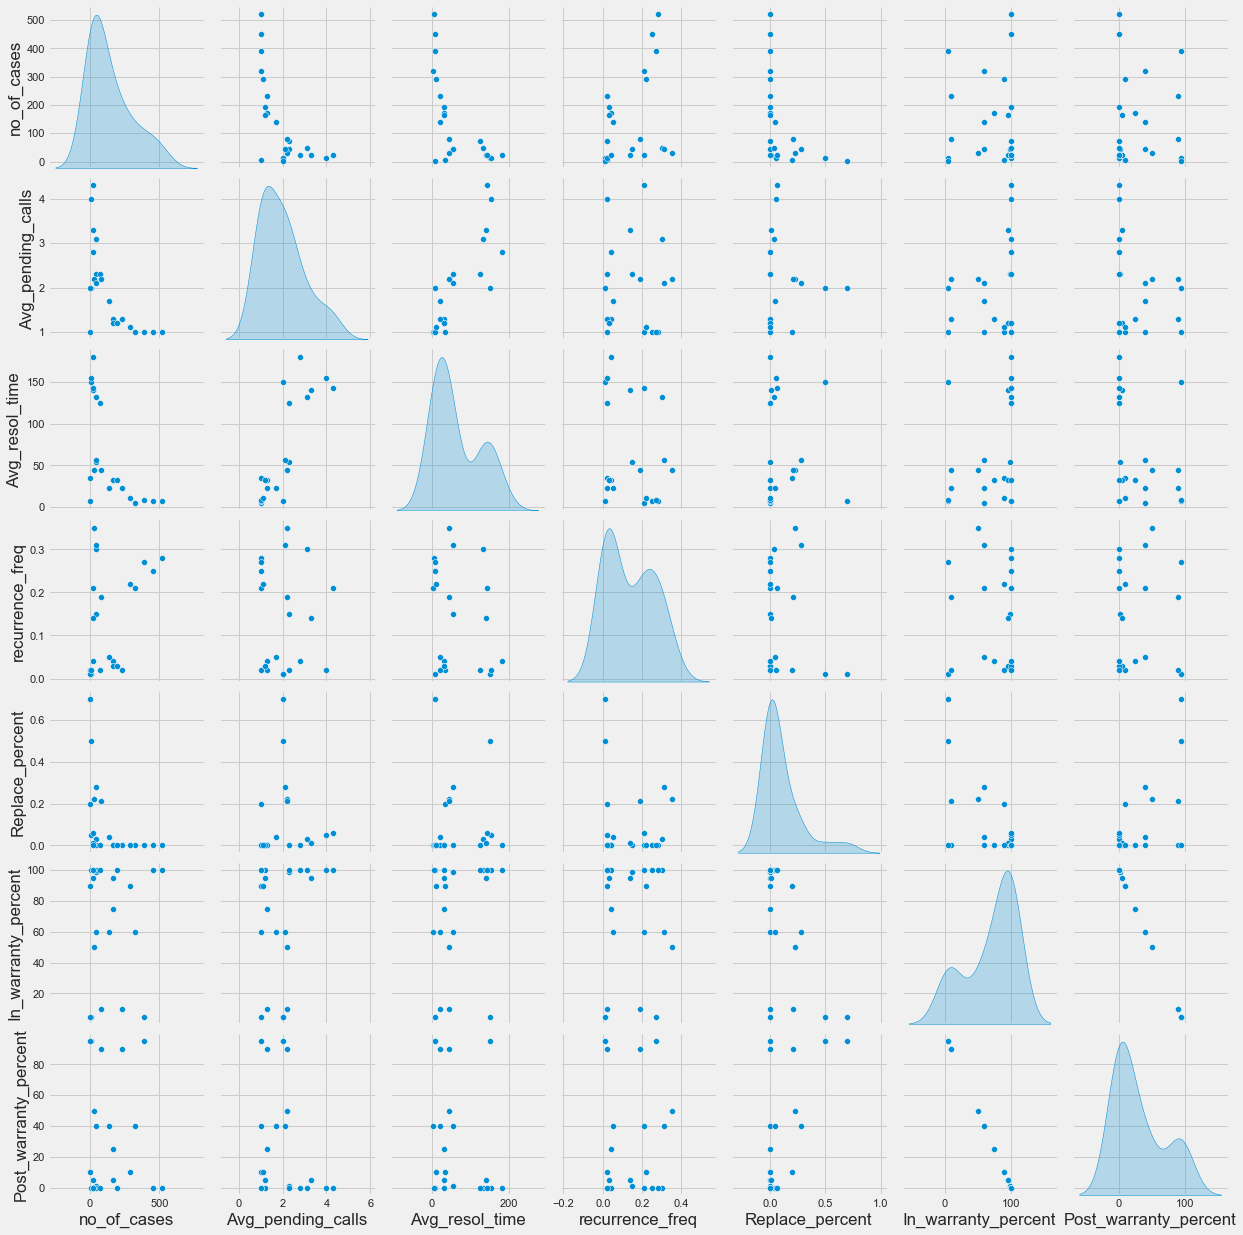

In [24]:
sns.pairplot(data=data, diag_kind='kde')

In [25]:
from scipy.spatial.distance import cdist 
from sklearn.cluster import KMeans

In [34]:
data_a=data.iloc[:,1:]
data_a=data_a.apply(zscore)
data_a

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074
5,-0.631441,1.171694,1.198266,1.397818,-0.393024,0.822449,-0.822449
6,-0.862176,2.108144,1.580322,-1.015573,-0.280732,0.822449,-0.822449
7,0.146467,-0.805257,-0.538351,-0.929380,-0.561463,0.685572,-0.685572
8,1.174886,-1.013357,-1.007238,0.622085,-0.561463,-0.272563,0.272563
9,-0.796251,1.379794,1.337195,0.018738,-0.505317,0.685572,-0.685572


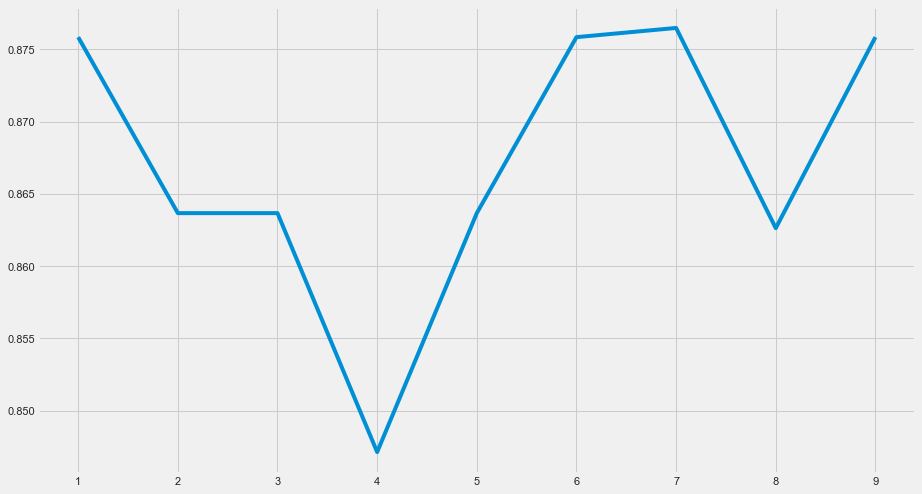

In [38]:
clusters=np.arange(1,10)
meanDistortion=[]
for i in clusters:
    model=KMeans( n_clusters=8)
    model.fit(data_a)
    predict=model.predict(data_a)
    meanDistortion.append(sum(np.min(cdist(data_a,model.cluster_centers_,'euclidean'),axis=1))/data_a.shape[0])
plt.plot(clusters,meanDistortion)

In [40]:
model=KMeans(3)
model.fit(data_a)
yhat=model.predict(data_a)

In [42]:
data_a['Groups']=yhat

In [44]:
data['Groups']=yhat

In [46]:
data_a["PROBLEM_TYPE"]=data['PROBLEM_TYPE']

array([[<AxesSubplot:title={'center':'Avg_pending_calls'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'Avg_resol_time'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'In_warranty_percent'}, xlabel='[Groups]'>],
       [<AxesSubplot:title={'center':'Post_warranty_percent'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'Replace_percent'}, xlabel='[Groups]'>,
        <AxesSubplot:title={'center':'no_of_cases'}, xlabel='[Groups]'>],
       [<AxesSubplot:title={'center':'recurrence_freq'}, xlabel='[Groups]'>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

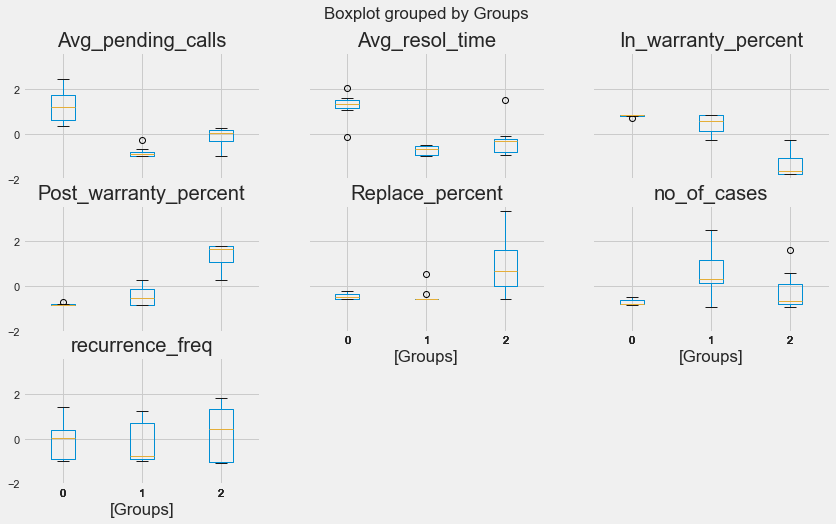

In [48]:
data_a.boxplot(by='Groups')